# Homework 4 (Part II)

Aprendizagem 2023/2024 - LEIC @ IST 

Group #24
- Daniel Nunes (Nº 103095)
- Gonçalo Alves (Nº 103540)

## Data importing and normalization

In [5]:
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import MinMaxScaler

# Load your ARFF file
data, meta = arff.loadarff('column_diagnosis.arff')

# Convert the ARFF data to a NumPy array
data = np.array(data.tolist())

# Extract the numeric features (the first 6 columns) for normalization
numeric_data = data[:, :-1].astype(float)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
normalized_data = scaler.fit_transform(numeric_data)

display(normalized_data)

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

## Exercise 1

Using sklearn, apply k-means clustering fully unsupervisedly on the normalized data with 
𝑘 ∈{2,3,4,5} (random=0 and remaining parameters as default). Assess the silhouette and purity of 
the produced solutions

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the range of k values to try
k_values = [2, 3, 4, 5]

# Perform k-means clustering for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=8, random_state=0, n_init='auto') # the default value of n_clusters is 8 
    cluster_labels = kmeans.fit_predict(normalized_data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    print(f"Silhouette score for k={k}: {silhouette_avg}")
    
    # Assess purity
    # You need to know the ground truth labels to calculate purity
    # If you don't have ground truth labels, purity cannot be calculated
    ground_truth_labels = data[:, -1].astype(str)
    le = LabelEncoder()
    ground_truth_labels_encoded = le.fit_transform(ground_truth_labels)
    
    # Assuming cluster_labels and ground_truth_labels_encoded have the same length
    accuracy = accuracy_score(ground_truth_labels_encoded, cluster_labels)
    print(f"Accuracy (Purity) for k={k}: {accuracy}")

Silhouette score for k=2: 0.20730150522479207
Accuracy (Purity) for k=2: 0.02258064516129032
Silhouette score for k=3: 0.20730150522479207
Accuracy (Purity) for k=3: 0.02258064516129032
Silhouette score for k=4: 0.20730150522479207
Accuracy (Purity) for k=4: 0.02258064516129032
Silhouette score for k=5: 0.20730150522479207
Accuracy (Purity) for k=5: 0.02258064516129032


## Exercise 2

Since we are in the presence of a integer regression task, a recommended trick is to 
round and bound estimates. Assess the impact of these operations on the MAE of the MLP 
learnt in previous question.

In [7]:
from sklearn.metrics import mean_absolute_error

# Function to round and bound estimates
def round_and_bound(predictions, lower_bound, upper_bound):
    return np.clip(np.round(predictions), lower_bound, upper_bound)

lower_bound = 1
upper_bound = 10

original_seed_mae = []
round_bound_seed_mae = []

y_pred_rounded_bounded_all = []

for y_pred in y_seed_predictions:
    # Calculate the original MAE for the unrounded predictions
    original_seed_mae.append(mean_absolute_error(y_test, y_pred))
    
    # Apply rounding and bounding to the predictions and calculate the MAE
    y_pred_rounded_bounded = round_and_bound(y_pred, lower_bound, upper_bound)
    y_pred_rounded_bounded_all.extend(y_pred_rounded_bounded)
    
    round_bound_seed_mae.append(mean_absolute_error(y_test, y_pred_rounded_bounded))

# Calculate the average MAE for both cases and print the results
print(f"Avg. MAE for Original Predictions: {np.mean(original_seed_mae)}")
print(f"Avg. MAE for Rounded and Bounded Predictions: " + \
      f"{np.mean(round_bound_seed_mae)}")

NameError: name 'y_seed_predictions' is not defined

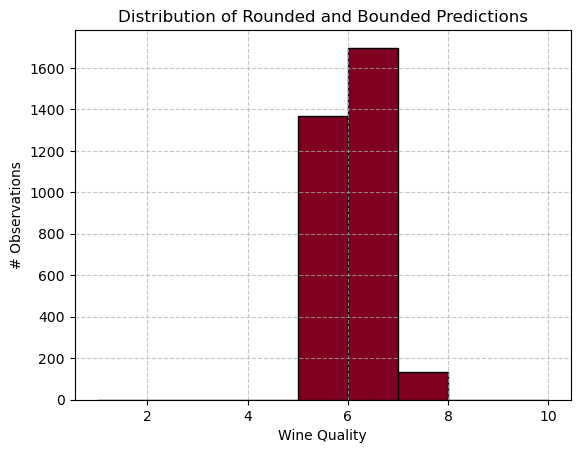

In [ ]:
# Plot the distribution of rounded and bounded predictions
redwine_color = (128/255, 0/255, 32/255)  # RGB values should be between 0 and 1
plt.hist(y_pred_rounded_bounded_all, bins=np.arange(lower_bound, upper_bound+1), \
         edgecolor='k', color=redwine_color)

plt.xlabel('Wine Quality')
plt.ylabel('# Observations')
plt.title('Distribution of Rounded and Bounded Predictions')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Our answer**

There is a slight decrease on the MAE when the round and bound method is applied to the model's predictions, hence the performance of this model improves when this method is applied.

## Exercise 3

 Similarly assess the impact on RMSE from replacing early stopping by a well-defined 
number of iterations in {20,50,100,200} (where one iteration corresponds to a batch).

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the original RSME for the predictions with early-stopping
original_rmse = 0
for y_pred in y_seed_predictions:
    original_rmse += np.sqrt(mean_squared_error(y_test, y_pred))

original_rmse = original_rmse / len(y_seed_predictions);

In [ ]:
iterations = [20, 50, 100, 200]

# Train the model with different numbers of iterations
rmse_scores = []
for num_iterations in iterations:
    rmse_iteration_scores = []

    for random_seed in random_seeds:
        # Learn a MLP Regressor with the same characteristics of the exercise 1,
        # except early-stopping gets replaced by a fixed number of iterations
        mlp = MLPRegressor(
            hidden_layer_sizes=(10, 10), 
            activation='relu', 
            random_state=random_seed, 
            max_iter=num_iterations
        )
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_iteration_scores.append(rmse)
    
    # Calculate the average RMSE for this number of iterations
    rmse_scores.append(np.mean(rmse_iteration_scores));

# Print the RMSE for each case
print(f"RMSE for early-stopping (20% validation): {original_rmse}")

for i, num_iterations in enumerate(iterations):
    print(f"RMSE for {num_iterations} iterations: {rmse_scores[i]}")


RMSE for early-stopping (20% validation): 0.6706527958221328
RMSE for 20 iterations: 1.4039789509925442
RMSE for 50 iterations: 0.7996073631460566
RMSE for 100 iterations: 0.6940361469112144
RMSE for 200 iterations: 0.6554543932216474


## Exercise 4

Critically comment the results obtained in previous question, hypothesizing at least 
one reason why early stopping favors and/or worsens performance.

**Our answer**

We can conclude from this data that, as the number of maximum iterations for training a model increases, its RMSE values decrease, meaning that the model gets more accurate as the amount of training increases.

However, too many iterations may start to cause overfitting on our model, meaning that, while it follows its predictions closer to the training data, it can be more error-prone when evaluating completely new sets of data. Hence, the early-stopping strategy tries to strike a balance between the model's accuracy to the training data and the possibility of overfitting, favouring performance in most cases. This might be the reason why its RMSE value is slightly larger than the one calculated from the model that stops training after 200 iterations.